In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
notMNIST = np.load('/work/MA490_DeepLearning/Data/notMNIST/notMNIST_train_AB.npz')
notMNIST.files
images = notMNIST['images_train']
labels = notMNIST['labels_train']
labels_name = notMNIST['label_names']
print(images.shape)
print(labels.shape)
print(labels_name.shape)

(100000, 28, 28)
(100000,)
(10,)


In [3]:
# Convert to 4D tensor
X = np.expand_dims(images,-1)
print(X.shape)
P = pd.get_dummies(pd.DataFrame(labels,columns=['digits'],dtype='category')).values
print(P.shape)

(100000, 28, 28, 1)
(100000, 2)


In [4]:
tally = pd.Series(labels).value_counts()
acc_baseline = tally.max()/tally.sum()
print('baseline accuracy rate is',acc_baseline)

baseline accuracy rate is 0.5


In [5]:
# n = 1000
# perm = np.random.permutation(len(X))[0:n]
# X = X[perm]
# P = P[perm]
# print('X shape',X.shape)
# print('P shape',P.shape)

In [6]:
model = Sequential()
def BuildLeNet(model,input_shape=(32,32,3),output=10):
    model.add(Conv2D(20,5,padding='same',input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2,strides=2))
    model.add(Conv2D(50,5,padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2,strides=2))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dense(output,activation='softmax'))
    return model
LeNet = BuildLeNet(model,input_shape=(28,28,1),output=2);
LeNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [7]:
LeNet.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])
hist = LeNet.fit(X,P,epochs=100,validation_split =0.2,verbose=1,callbacks=[EarlyStopping(patience=3)])

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 [==============================] - 64s 796us/step - loss: 0.0835 - acc: 0.9631 - val_loss: 0.0969 - val_acc: 0.9513
Epoch 2/100
80000/80000 [==============================] - 62s 779us/step - loss: 0.0606 - acc: 0.9729 - val_loss: 0.0971 - val_acc: 0.9494
Epoch 3/100
80000/80000 [==============================] - 63s 792us/step - loss: 0.0495 - acc: 0.9778 - val_loss: 0.0783 - val_acc: 0.9599
Epoch 4/100
80000/80000 [==============================] - 66s 828us/step - loss: 0.0394 - acc: 0.9825 - val_loss: 0.1007 - val_acc: 0.9545
Epoch 5/100
80000/80000 [==============================] - 64s 797us/step - loss: 0.0304 - acc: 0.9871 - val_loss: 0.1061 - val_acc: 0.9611
Epoch 6/100
80000/80000 [==============================] - 62s 776us/step - loss: 0.0232 - acc: 0.9907 - val_loss: 0.1248 - val_acc: 0.9601


Text(0.5,1,'cross-entropy')

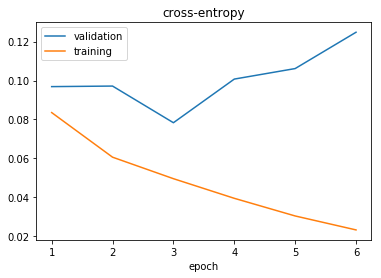

In [8]:
results = pd.DataFrame() 
results['epoch'] = hist.epoch 
results['epoch'] = results['epoch'] + 1 
results['training loss'] = hist.history['loss'] 
results['validation loss'] = hist.history['val_loss'] 
results['training acc'] = hist.history['acc'] 
results['validation acc'] = hist.history['val_acc'] 
results['validation']=hist.history['val_loss']
results['training']=hist.history['loss'] 

ax = results.plot.line(x='epoch',y='validation')
results.plot.line(x='epoch',y='training',ax=ax)
plt.title('cross-entropy')

In [9]:
ix = results['validation loss'].idxmin() 
ce_training = results['training loss'].iloc[ix] 
ce_validation = results['validation loss'].iloc[ix] 
acc_training = results['training acc'].iloc[ix] 
acc_validation = results['validation acc'].iloc[ix] 
print() 
print('minimum validation loss index',ix,'of',100) 
print('cross-entropy') 
print(' training =',ce_training) 
print(' validation =',ce_validation) 
print('accuracy rate') 
print(' training =',acc_training) 
print(' validation =',acc_validation) 
print(' baseline =',acc_baseline)


minimum validation loss index 2 of 100
cross-entropy
 training = 0.04954373045349275
 validation = 0.07830837915240554
accuracy rate
 training = 0.97775
 validation = 0.95995
 baseline = 0.5


In [15]:
nonMNIST_test = np.load('/work/MA490_DeepLearning/Data/notMNIST/notMNIST_test_AB.npz')
image_test = nonMNIST_test['test_images']
label_test = nonMNIST_test['test_labels']
print(X_test.shape)
print(P_test.shape)

(2000, 784, 1)
(2000, 2)


In [16]:
X_test = np.expand_dims(image_test,-1)
P_test = pd.get_dummies(pd.DataFrame(label_test,columns=['digit'],dtype='category')).values

test acc 0.9915
errors 17


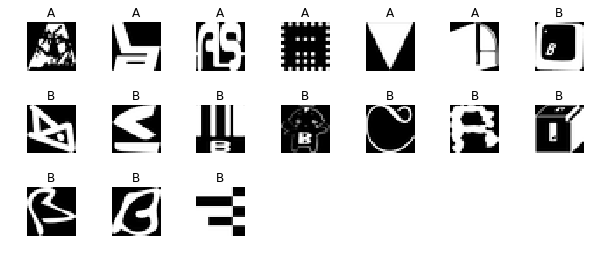

In [23]:
Ph_test = model.predict(X_test) 
ix_errors = (Ph_test.argmax(axis=1) != P_test.argmax(axis=1)) 
images_errors = image_test[ix_errors,:,:] 
labels_errors = label_test[ix_errors]
acc_test = 1 - len(images_errors)/len(image_test)
print('test acc',acc_test)
print('errors',len(images_errors))

# image grid code 
N = 7 
M = 7 
plt.figure(figsize=(10,10)) 
plt.subplots_adjust(wspace=0.7,hspace=0.7)
for i in range(len(images_errors)): 
    plt.subplot(M, N, i+1) 
    plt.axis('off')
    plt.imshow(images_errors[i,:,:], cmap='Greys_r') 
    plt.title(labels_name[labels_errors[i]]) 
plt.show()

In [24]:
# Assume all the data that the network labeled correct can be cognized correctly by human.
# I made 14 mistake in the pictures above.
1-14/2000

0.993